In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
tf.__version__ 

'2.8.0'

In [ ]:
import os
import numpy as np
import random
os.environ['TF_DETERMINISTIC_OPS'] ='1'
os.environ['TF_CUDNN_DETERMINISTIC']='1'
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)
SEED=1
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# 1. 資料準備

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= cifar10.load_data()

In [ ]:
y_train_label=y_train_label.reshape(-1)
y_test_label=y_test_label.reshape(-1)

In [ ]:
x_train_normalize = x_train_image.astype('float32') / 255.0
x_test_normalize = x_test_image.astype('float32') / 255.0

In [ ]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_label)
y_test_onehot = utils.to_categorical(y_test_label)

In [ ]:
print("train data:",'images:',x_train_normalize.shape," labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_test_normalize.shape ," labels:",y_test_onehot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


In [ ]:
class_names=[
  "airplane","automobile","bird","cat","deer",
  "dog","frog","horse","ship","truck"]

# 建立模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dense,Activation
from tensorflow.keras.layers import Dropout,BatchNormalization, Flatten

In [ ]:
from tensorflow.keras.regularizers import l2
reg=l2(0.02)

In [ ]:
def block(p_bname,p_filters,p_conv):
  for i in range(p_conv):
    model.add(Conv2D(filters=p_filters,kernel_size=(3,3),
             activation='relu',padding='same',kernel_regularizer=reg,
             bias_regularizer=reg,name=p_bname+'_conv'+str(i)))
  model.add(MaxPooling2D(pool_size=(2, 2),name=p_bname+'_pool'))  

In [ ]:
model = Sequential()
model.add(Input(shape=(32, 32,3)))
block(p_bname='B1',p_filters=32,p_conv=2)
block(p_bname='B2',p_filters=64,p_conv=2)
block(p_bname='B3',p_filters=128,p_conv=2)
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer=reg,
        bias_regularizer=reg))
model.add(Dense(10, activation='softmax',kernel_regularizer=reg,
        bias_regularizer=reg))

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 B1_conv0 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 B1_conv1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 B1_pool (MaxPooling2D)      (None, 16, 16, 32)        0         
                                                                 
 B2_conv0 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 B2_conv1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 B2_pool (MaxPooling2D)      (None, 8, 8, 64)          0         
                                                                 
 B3_conv0 (Conv2D)           (None, 8, 8, 128)        

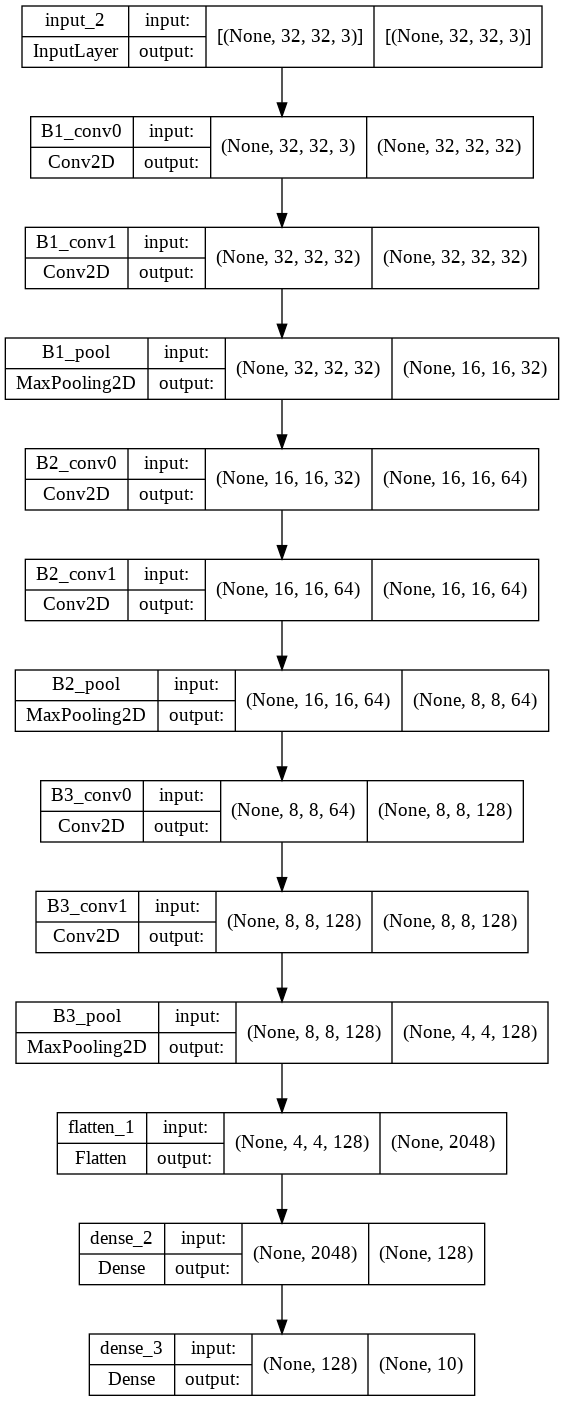

In [ ]:
tf.keras.utils.plot_model(model, 'cifarcnn.png', show_shapes=True)

# 訓練模型

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [ ]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,
    validation_split=0.2,batch_size=200,epochs=30,verbose=2)       

Epoch 1/30
200/200 - 7s - loss: 3.4395 - acc: 0.0994 - val_loss: 2.3144 - val_acc: 0.0952 - 7s/epoch - 36ms/step
Epoch 2/30
200/200 - 6s - loss: 2.3053 - acc: 0.1009 - val_loss: 2.3027 - val_acc: 0.1003 - 6s/epoch - 28ms/step
Epoch 3/30
200/200 - 6s - loss: 2.3027 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1014 - 6s/epoch - 28ms/step
Epoch 4/30
200/200 - 6s - loss: 2.3027 - acc: 0.0988 - val_loss: 2.3027 - val_acc: 0.0952 - 6s/epoch - 29ms/step
Epoch 5/30
200/200 - 6s - loss: 2.3027 - acc: 0.0998 - val_loss: 2.3027 - val_acc: 0.0977 - 6s/epoch - 28ms/step
Epoch 6/30
200/200 - 6s - loss: 2.3027 - acc: 0.0993 - val_loss: 2.3027 - val_acc: 0.0952 - 6s/epoch - 29ms/step
Epoch 7/30
200/200 - 6s - loss: 2.3027 - acc: 0.0990 - val_loss: 2.3027 - val_acc: 0.0952 - 6s/epoch - 28ms/step
Epoch 8/30
200/200 - 6s - loss: 2.3027 - acc: 0.0977 - val_loss: 2.3027 - val_acc: 0.0952 - 6s/epoch - 28ms/step
Epoch 9/30
200/200 - 6s - loss: 2.3027 - acc: 0.1012 - val_loss: 2.3027 - val_acc: 0.0952 - 6s/e

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

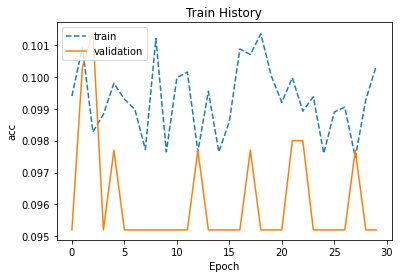

In [ ]:
show_train_history(train_history,'acc','val_acc')

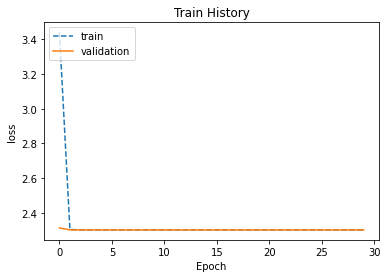

In [ ]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_test_normalize, y_test_onehot,verbose=2)

313/313 - 2s - loss: 2.3026 - acc: 0.1000 - 2s/epoch - 5ms/step


In [ ]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 2.302593469619751 test_acc= 0.10000000149011612


# 進行預測

In [ ]:
probability = model.predict(x_test_normalize)

In [ ]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [ ]:
prediction

array([2, 2, 2, ..., 2, 2, 2])

# 查看預測結果

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
label_dict={
    0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
    5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

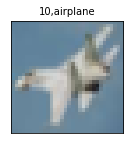

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,[],idx=10,num=1)

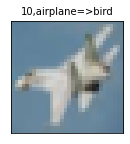

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=1)

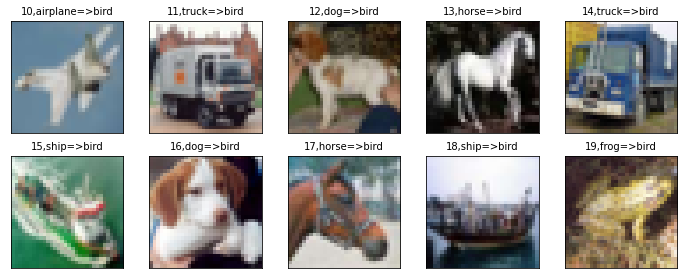

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=10)

# 查看預測機率

In [ ]:
def show_predicted_probability(
  images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary') 
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))     

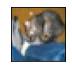

label: cat
predict: bird
airplane   Probability:0.100078821
automobile Probability:0.100007847
bird       Probability:0.100669846
cat        Probability:0.099827364
deer       Probability:0.099805802
dog        Probability:0.100012891
frog       Probability:0.100014791
horse      Probability:0.100405686
ship       Probability:0.099709503
truck      Probability:0.099467441


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,0) 

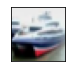

label: ship
predict: bird
airplane   Probability:0.100078821
automobile Probability:0.100007847
bird       Probability:0.100669846
cat        Probability:0.099827364
deer       Probability:0.099805802
dog        Probability:0.100012891
frog       Probability:0.100014791
horse      Probability:0.100405686
ship       Probability:0.099709503
truck      Probability:0.099467441


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1) 

# confusion matrix

In [ ]:
prediction

In [ ]:
import pandas as pd

In [ ]:
cm=pd.crosstab(
    index=y_test_label,columns=prediction,
    rownames=['label'],colnames=['predict'])

In [ ]:
cm

predict,2
label,
0,1000
1,1000
2,1000
3,1000
4,1000
5,1000
6,1000
7,1000
8,1000


#heapmap cm

In [ ]:
import numpy as np

In [ ]:
cm_mat=cm.to_numpy()

In [ ]:
cm_mat

array([[1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000]])

In [ ]:
cm_mat.sum(axis=0)

array([10000])

In [ ]:
cm_mat.sum(axis=1)[:, np.newaxis]

array([[1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000]])

In [ ]:
cm_norm = np.around(
    cm_mat.astype('float') / 
    cm_mat.sum(axis=1)[:, np.newaxis], 
    decimals=3)

In [ ]:
cm_norm 

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
#因為準確率太低，所以執行會有錯誤
class_names=["airplane","automobile","bird","cat","deer",
       "dog","frog","horse","ship","truck"]
cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)

ValueError: ignored

In [ ]:
cm_df

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(8, 6))
plt.ylabel('Label')
plt.xlabel('Predicted')
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
plt.show()

#heatmap_confusion_matrix

In [ ]:
class_names=[
  "airplane","automobile","bird","cat","deer",
  "dog","frog","horse","ship","truck"]
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def plot_heatmap_confusion_matrix(cm_np):
  cm_norm = np.around(
      cm_np.astype('float') / 
      cm_np.sum(axis=1)[:, np.newaxis],decimals=3)
  cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)
  figure = plt.figure(figsize=(8, 6))
  plt.tight_layout();sns.set(font_scale=1)
  plt.ylabel('Label');plt.xlabel('Predicted')
  sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
  return figure

In [ ]:
figure = plot_heatmap_confusion_matrix(cm.to_numpy())

In [ ]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

In [ ]:
df[:5]

In [ ]:
df[(df.label==5)&(df.predict==3)]

# 查看預測錯誤資料

In [ ]:
show_predicted_probability(
    x_test_image,y_test_label,prediction,probability,33)

In [ ]:
show_predicted_probability(
    x_test_image,y_test_label,prediction,probability,178)